---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 4

In [0]:
import networkx as nx
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

---

## Part 1 - Random Graph Identification

For the first part of this assignment you will analyze randomly generated graphs and determine which algorithm created them.

In [0]:
P1_Graphs = pickle.load(open('A4_graphs','rb'))
P1_Graphs

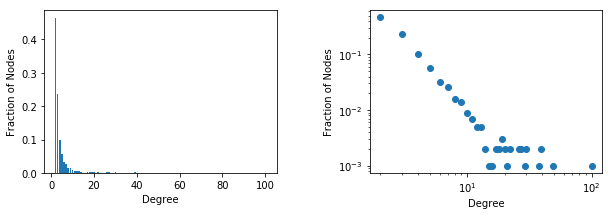

average_clustering = 0.03167539146454044
average_shortest_path_length = 4.099161161161161


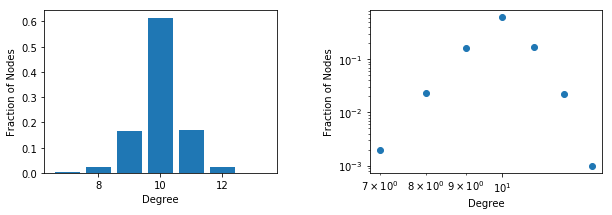

average_clustering = 0.5642419635919628
average_shortest_path_length = 5.089871871871872


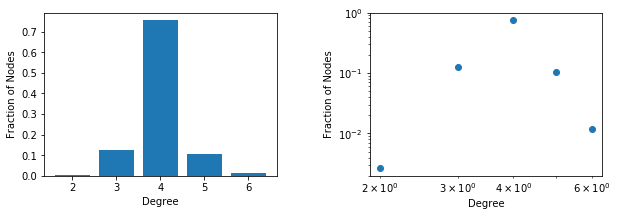

average_clustering = 0.4018222222222227
average_shortest_path_length = 9.378702269692925


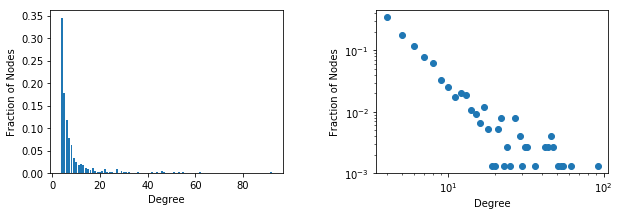

average_clustering = 0.03780379975223251
average_shortest_path_length = 3.1048046283934134


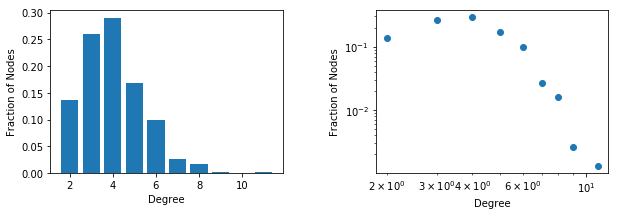

average_clustering = 0.0033037037037037037
average_shortest_path_length = 5.0785509568313305


In [0]:
plt.figure()
for G in P1_Graphs:
    degrees = G.degree()
    degree_values = sorted(set(degrees.values()))
    hist = [list(degrees.values()).count(i)/float(nx.number_of_nodes(G)) for i in degree_values]
    
    plt.figure(figsize=(10,3))
    plt.subplot(121)
    plt.bar(degree_values, hist)
    plt.xlabel('Degree')
    plt.ylabel('Fraction of Nodes')
    
    plt.subplot(122)
    plt.plot(degree_values, hist, 'o')
    plt.xlabel('Degree')
    plt.ylabel('Fraction of Nodes')
    plt.xscale('log')
    plt.yscale('log')
    plt.subplots_adjust(wspace=0.4)
    plt.show()
    
    print(f'average_clustering = {nx.average_clustering(G)}')
    print(f'average_shortest_path_length = {nx.average_shortest_path_length(G)}')

<br>
`P1_Graphs` is a list containing 5 networkx graphs. Each of these graphs were generated by one of three possible algorithms:
* Preferential Attachment (`'PA'`)
* Small World with low probability of rewiring (`'SW_L'`)
* Small World with high probability of rewiring (`'SW_H'`)

Anaylze each of the 5 graphs and determine which of the three algorithms generated the graph.

*The `graph_identification` function should return a list of length 5 where each element in the list is either `'PA'`, `'SW_L'`, or `'SW_H'`.*

In [0]:
def graph_identification():
    
    result = []
    for G in P1_Graphs:  
        average_clustering = nx.average_clustering(G)
        if average_clustering < 0.01:
            result.append("SW_H")
        elif average_clustering > 0.1:
            result.append("SW_L")
        else:
            result.append("PA")
    return result

graph_identification()

['PA', 'SW_L', 'SW_L', 'PA', 'SW_H']

---

## Part 2 - Company Emails

For the second part of this assignment you will be workking with a company's email network where each node corresponds to a person at the company, and each edge indicates that at least one email has been sent between two people.

The network also contains the node attributes `Department` and `ManagementSalary`.

`Department` indicates the department in the company which the person belongs to, and `ManagementSalary` indicates whether that person is receiving a management position salary.

In [0]:
G = nx.read_gpickle('email_prediction.txt')

print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1005
Number of edges: 16706
Average degree:  33.2458


In [0]:
G.nodes(data=True)

[(0, {'Department': 1, 'ManagementSalary': 0.0}),
 (1, {'Department': 1, 'ManagementSalary': nan}),
 (2, {'Department': 21, 'ManagementSalary': nan}),
 (3, {'Department': 21, 'ManagementSalary': 1.0}),
 (4, {'Department': 21, 'ManagementSalary': 1.0}),
 (5, {'Department': 25, 'ManagementSalary': nan}),
 (6, {'Department': 25, 'ManagementSalary': 1.0}),
 (7, {'Department': 14, 'ManagementSalary': 0.0}),
 (8, {'Department': 14, 'ManagementSalary': nan}),
 (9, {'Department': 14, 'ManagementSalary': 0.0}),
 (10, {'Department': 9, 'ManagementSalary': 0.0}),
 (11, {'Department': 14, 'ManagementSalary': 0.0}),
 (12, {'Department': 14, 'ManagementSalary': 1.0}),
 (13, {'Department': 26, 'ManagementSalary': 1.0}),
 (14, {'Department': 4, 'ManagementSalary': nan}),
 (15, {'Department': 17, 'ManagementSalary': 0.0}),
 (16, {'Department': 34, 'ManagementSalary': 0.0}),
 (17, {'Department': 1, 'ManagementSalary': 0.0}),
 (18, {'Department': 1, 'ManagementSalary': nan}),
 (19, {'Department': 14, 'Ma

In [0]:
G.edges(data=True)

[(0, 1, {}),
 (0, 17, {}),
 (0, 316, {}),
 (0, 146, {}),
 (0, 581, {}),
 (0, 268, {}),
 (0, 221, {}),
 (0, 218, {}),
 (0, 18, {}),
 (0, 734, {}),
 (0, 178, {}),
 (0, 380, {}),
 (0, 0, {}),
 (0, 459, {}),
 (0, 215, {}),
 (0, 250, {}),
 (0, 148, {}),
 (0, 73, {}),
 (0, 74, {}),
 (0, 248, {}),
 (0, 498, {}),
 (0, 226, {}),
 (0, 101, {}),
 (0, 377, {}),
 (0, 177, {}),
 (0, 103, {}),
 (0, 560, {}),
 (0, 309, {}),
 (0, 88, {}),
 (0, 5, {}),
 (0, 297, {}),
 (0, 313, {}),
 (0, 223, {}),
 (0, 238, {}),
 (0, 368, {}),
 (0, 266, {}),
 (0, 222, {}),
 (0, 283, {}),
 (0, 6, {}),
 (0, 64, {}),
 (0, 65, {}),
 (0, 166, {}),
 (0, 120, {}),
 (1, 74, {}),
 (1, 17, {}),
 (1, 316, {}),
 (1, 1, {}),
 (1, 268, {}),
 (1, 495, {}),
 (1, 377, {}),
 (1, 549, {}),
 (1, 310, {}),
 (1, 218, {}),
 (1, 215, {}),
 (1, 147, {}),
 (1, 106, {}),
 (1, 21, {}),
 (1, 225, {}),
 (1, 82, {}),
 (1, 254, {}),
 (1, 155, {}),
 (1, 146, {}),
 (1, 85, {}),
 (1, 284, {}),
 (1, 189, {}),
 (1, 250, {}),
 (1, 726, {}),
 (1, 548, {}),
 (

### Part 2A - Salary Prediction

Using network `G`, identify the people in the network with missing values for the node attribute `ManagementSalary` and predict whether or not these individuals are receiving a management position salary.

To accomplish this, you will need to create a matrix of node features using networkx, train a sklearn classifier on nodes that have `ManagementSalary` data, and predict a probability of the node receiving a management salary for nodes where `ManagementSalary` is missing.



Your predictions will need to be given as the probability that the corresponding employee is receiving a management position salary.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.88 or higher will receive full points, and with an AUC of 0.82 or higher will pass (get 80% of the full points).

Using your trained classifier, return a series of length 252 with the data being the probability of receiving management salary, and the index being the node id.

    Example:
    
        1       1.0
        2       0.0
        5       0.8
        8       1.0
            ...
        996     0.7
        1000    0.5
        1001    0.0
        Length: 252, dtype: float64

In [0]:
df = pd.DataFrame(index=G.nodes())
df['Department'] = pd.Series(nx.get_node_attributes(G, 'Department'))
df['ManagementSalary'] = pd.Series(nx.get_node_attributes(G, 'ManagementSalary'))
df['clustering'] = pd.Series(nx.clustering(G))
df['degree'] = pd.Series(G.degree())
df['degree_centrality'] = pd.Series(nx.degree_centrality(G))
df['closeness_centrality'] = pd.Series(nx.closeness_centrality(G))
df['betweenness_centrality'] = pd.Series(nx.betweenness_centrality(G))
df.head(10)

,Department,ManagementSalary,clustering,degree,degree_centrality,closeness_centrality,betweenness_centrality
0,1,0.0,0.276423,44,0.043825,0.421991,0.001124
1,1,NaN,0.265306,52,0.051793,0.422360,0.001195
2,21,NaN,0.297803,95,0.094622,0.461490,0.006570
3,21,1.0,0.384910,71,0.070717,0.441663,0.001654
4,21,1.0,0.318691,96,0.095618,0.462152,0.005547
5,25,NaN,0.107002,171,0.170319,0.501484,0.030995
6,25,1.0,0.155183,115,0.114542,0.475805,0.012387
7,14,0.0,0.287785,72,0.071713,0.420156,0.002818
8,14,NaN,0.447059,37,0.036853,0.413151,0.000557
9,14,0.0,0.425320,40,0.039841,0.356196,0.000280


In [0]:
df.corr()

,Department,ManagementSalary,clustering,degree,degree_centrality,closeness_centrality,betweenness_centrality
Department,1.000000,0.166695,-0.012335,0.195517,0.195517,0.116739,0.185117
ManagementSalary,0.166695,1.000000,-0.021997,0.549782,0.549782,0.380419,0.451935
clustering,-0.012335,-0.021997,1.000000,-0.194092,-0.194092,0.092360,-0.204197
degree,0.195517,0.549782,-0.194092,1.000000,1.000000,0.673939,0.799805
degree_centrality,0.195517,0.549782,-0.194092,1.000000,1.000000,0.673939,0.799805
closeness_centrality,0.116739,0.380419,0.092360,0.673939,0.673939,1.000000,0.404912
betweenness_centrality,0.185117,0.451935,-0.204197,0.799805,0.799805,0.404912,1.000000


In [0]:
target = df['ManagementSalary'].isnull()
df_X = df[~target].drop(['ManagementSalary','Department'], axis=1)
df_y = df[~target]['ManagementSalary']

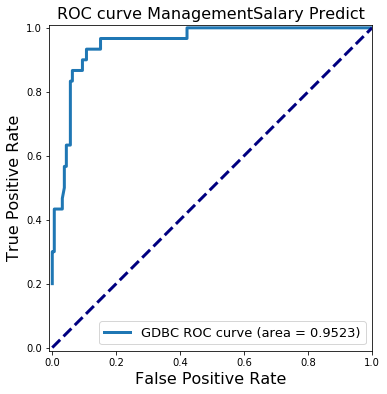

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, random_state=0)
#clf = LogisticRegression().fit(X_train, y_train)
clf = GradientBoostingClassifier().fit(X_train, y_train)
clf_predicted = clf.predict(X_test)

y_score_clf = clf.fit(X_train, y_train).decision_function(X_test)
fpr_clf, tpr_clf, _ = roc_curve(y_test, y_score_clf)
roc_auc_clf = auc(fpr_clf, tpr_clf)

plt.figure(figsize=(6,6))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_clf, tpr_clf, lw=3, label='GDBC ROC curve (area = {:.4f})'.format(roc_auc_clf))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve ManagementSalary Predict', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

In [0]:
def salary_predictions():
    
    X_predict = df[target].drop(['ManagementSalary','Department'], axis=1)   
    return pd.Series(data=clf.predict_proba(X_predict)[:,1], index=df.index[target]) 

salary_predictions()

1       0.010597
2       0.982848
5       0.989325
8       0.125858
14      0.028512
18      0.028512
27      0.017057
30      0.898008
31      0.224687
34      0.012675
37      0.033135
40      0.018023
45      0.010607
54      0.322608
55      0.768327
60      0.127459
62      0.989325
65      0.982863
77      0.015731
79      0.018183
97      0.010472
101     0.002782
103     0.498670
108     0.016479
113     0.014351
122     0.001916
141     0.066901
142     0.989325
144     0.010472
145     0.601803
          ...   
913     0.006336
914     0.007588
915     0.000889
918     0.026725
923     0.009487
926     0.029178
931     0.004994
934     0.000852
939     0.000851
944     0.000889
945     0.009487
947     0.025592
950     0.015821
951     0.003715
953     0.001916
959     0.000889
962     0.000851
963     0.029824
968     0.022880
969     0.020336
974     0.034396
984     0.000851
987     0.034396
989     0.022880
991     0.022880
992     0.000889
994     0.000889
996     0.0008

### Part 2B - New Connections Prediction

For the last part of this assignment, you will predict future connections between employees of the network. The future connections information has been loaded into the variable `future_connections`. The index is a tuple indicating a pair of nodes that currently do not have a connection, and the `Future Connection` column indicates if an edge between those two nodes will exist in the future, where a value of 1.0 indicates a future connection.

In [3]:
future_connections = pd.read_csv('Future_Connections.csv', index_col=0, converters={0: eval})
future_connections.head(10)

,Future Connection
"(6, 840)",0.0
"(4, 197)",0.0
"(620, 979)",0.0
"(519, 872)",0.0
"(382, 423)",0.0
"(97, 226)",1.0
"(349, 905)",0.0
"(429, 860)",0.0
"(309, 989)",0.0
"(468, 880)",0.0


In [4]:
G = nx.Graph()   # or DiGraph, MultiGraph, MultiDiGraph, etc
G.add_edges_from(future_connections.index)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1005
Number of edges: 488446
Average degree: 972.0318


In [0]:
future_connections['comm_neighbors'] = [len(list(nx.common_neighbors(G, node_pair[0], node_pair[1]))) 
                                            for node_pair in future_connections.index]

In [0]:
future_connections['pref_attachment'] = [list(nx.preferential_attachment(G, [node_pair]))[0][2]
                                             for node_pair in future_connections.index]    

In [7]:
future_connections['jac_coef'] = [ p for u,v,p in nx.jaccard_coefficient(G,future_connections.index)]
future_connections.head()

,Future Connection,comm_neighbors,pref_attachment,jac_coef
"(6, 840)",0.0,883,880308,0.886546
"(4, 197)",0.0,876,881790,0.873380
"(620, 979)",0.0,996,1000998,0.991045
"(519, 872)",0.0,971,974153,0.968096
"(382, 423)",0.0,959,964035,0.954229


In [8]:
future_connections['ra_index'] = [ p for u,v,p in nx.resource_allocation_index(G,future_connections.index)]
future_connections.head()

,Future Connection,comm_neighbors,pref_attachment,jac_coef,ra_index
"(6, 840)",0.0,883,880308,0.886546,0.906144
"(4, 197)",0.0,876,881790,0.873380,0.896201
"(620, 979)",0.0,996,1000998,0.991045,1.025882
"(519, 872)",0.0,971,974153,0.968096,0.999184
"(382, 423)",0.0,959,964035,0.954229,0.985657


In [13]:
future_connections.corr()

,Future Connection,comm_neighbors,pref_attachment,jac_coef,ra_index
Future Connection,1.000000,-0.317265,-0.348258,-0.278781,-0.318381
comm_neighbors,-0.317265,1.000000,0.998506,0.997904,0.999798
pref_attachment,-0.348258,0.998506,1.000000,0.992993,0.998489
jac_coef,-0.278781,0.997904,0.992993,1.000000,0.997541
ra_index,-0.318381,0.999798,0.998489,0.997541,1.000000


In [0]:
target = future_connections['Future Connection'].isnull()
df_X = future_connections[~target].drop(['Future Connection'], axis=1)
df_y = future_connections[~target]['Future Connection']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


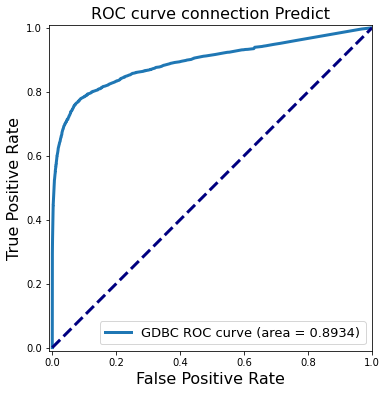

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, random_state=0)
#clf = LogisticRegression().fit(X_train, y_train)
clf = GradientBoostingClassifier().fit(X_train, y_train)
clf_predicted = clf.predict(X_test)

y_score_clf = clf.fit(X_train, y_train).decision_function(X_test)
fpr_clf, tpr_clf, _ = roc_curve(y_test, y_score_clf)
roc_auc_clf = auc(fpr_clf, tpr_clf)

plt.figure(figsize=(6,6))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_clf, tpr_clf, lw=3, label='GDBC ROC curve (area = {:.4f})'.format(roc_auc_clf))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve connection Predict', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

Using network `G` and `future_connections`, identify the edges in `future_connections` with missing values and predict whether or not these edges will have a future connection.

To accomplish this, you will need to create a matrix of features for the edges found in `future_connections` using networkx, train a sklearn classifier on those edges in `future_connections` that have `Future Connection` data, and predict a probability of the edge being a future connection for those edges in `future_connections` where `Future Connection` is missing.



Your predictions will need to be given as the probability of the corresponding edge being a future connection.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.88 or higher will receive full points, and with an AUC of 0.82 or higher will pass (get 80% of the full points).

Using your trained classifier, return a series of length 122112 with the data being the probability of the edge being a future connection, and the index being the edge as represented by a tuple of nodes.

    Example:
    
        (107, 348)    0.35
        (542, 751)    0.40
        (20, 426)     0.55
        (50, 989)     0.35
                  ...
        (939, 940)    0.15
        (555, 905)    0.35
        (75, 101)     0.65
        Length: 122112, dtype: float64

In [12]:
def new_connections_predictions():
    
    X_predict = future_connections[target].drop(['Future Connection'], axis=1)   
    return pd.Series(data=clf.predict_proba(X_predict)[:,1], index=future_connections.index[target]) 

new_connections_predictions()

ERROR! Session/line number was not unique in database. History logging moved to new session 59


(107, 348)    0.149336
(542, 751)    0.021544
(20, 426)     0.365541
(50, 989)     0.021396
(942, 986)    0.021396
                ...   
(165, 923)    0.080012
(673, 755)    0.021396
(939, 940)    0.021396
(555, 905)    0.020266
(75, 101)     0.029518
Length: 122112, dtype: float64